In [1]:
!pip install cython

In [2]:
!git clone https://github.com/pdollar/coco.git

Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [3]:
cd coco/PythonAPI

/content/coco/PythonAPI


In [4]:
!python setup.py build_ext --inplace

running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.7.11=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.7.11=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import json
from pycocotools.coco import COCO
from collections import Counter
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
coco = COCO('/content/drive/MyDrive/uiqa_train.json')
dict_keys = coco.imgs.keys()
list_keys = list(dict_keys)
num = len(list_keys)

loading annotations into memory...
Done (t=7.39s)
creating index...
index created!


Statistics about Bounding_boxes!(Not considering Resize, only keen on aspect-radio)

In [8]:
ids = list(sorted(coco.imgs.keys()))
coco_classes = dict([(v["id"], v["name"]) for k, v in coco.cats.items()])
w_bboxes = []
h_bboxes = []
catid_boxes_w = {}
catid_boxes_h = {}
for img_id in ids:
  ann_ids = coco.getAnnIds(imgIds=img_id)
  targets = coco.loadAnns(ann_ids)
  for target in targets:
    x, y, w, h = target["bbox"]
    w_bboxes.append(w)
    h_bboxes.append(h)
    ann = target["category_id"]
    ann = coco_classes[ann]
    if ann not in catid_boxes_h:
      catid_boxes_h[ann] = [h]
      catid_boxes_w[ann] = [w]
    else:
      catid_boxes_h[ann].append(h)
      catid_boxes_w[ann].append(w)

In [ ]:
num_ratio_1 = 0
num_ratio_2 = 0
for i in range(len(w_bboxes)):
  if h_bboxes[i] < w_bboxes[i]:
    num_ratio_1 += 1
  else:
    num_ratio_2 += 1
print(num_ratio_1/len(w_bboxes))
print(num_ratio_2/len(w_bboxes))

0.759576379328855
0.24042362067114495


In [ ]:
for key in catid_boxes_w:
  print(key,":", len(catid_boxes_w[key]))

label : 301945
range : 36695
hint_text : 54331
textfield : 37366
validation_text : 40179
switch : 19781
textarea : 36925
button : 37447
checkbox : 86082
radio_button : 85096


In [9]:
import numpy as np     
from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans     
import matplotlib.font_manager as fm 
import pandas as pd

In [10]:
X = []
for i in range(len(h_bboxes)):
  X.append([w_bboxes[i], h_bboxes[i]])
X = np.array(X)

             0           1
0    30.517786   18.373479
1   905.410523   40.458771
2   134.688038   25.013674
3   492.050314   15.390538
4  1102.685649   41.232321
5  1016.088521  269.669306


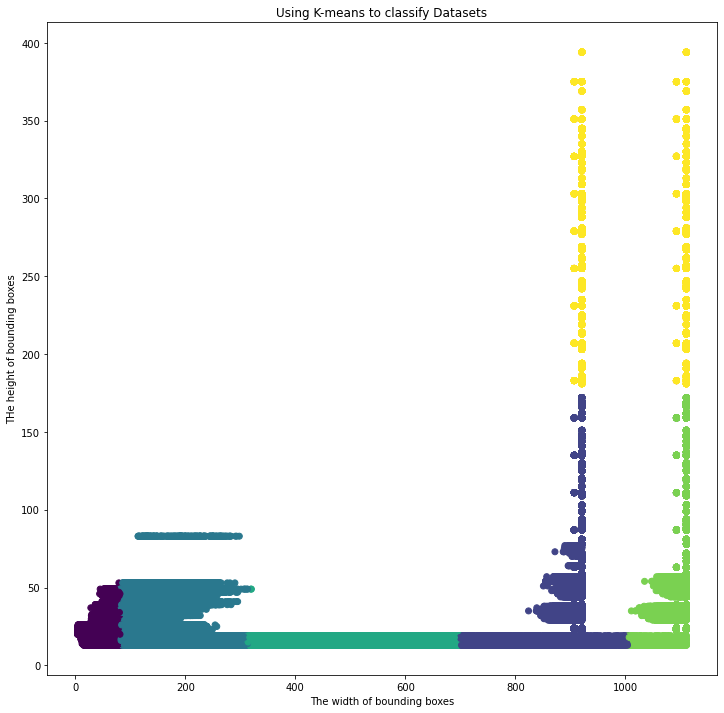

In [12]:
plt.figure(figsize=(12, 12))
random_state = 20
y = KMeans(n_clusters=6, init='k-means++')
y_pred = y.fit_predict(X)
center = pd.DataFrame(y.cluster_centers_)
print(center)
plt.ylabel("THe height of bounding boxes")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Using K-means to classify Datasets")
plt.xlabel("The width of bounding boxes")
plt.ylabel("THe height of bounding boxes")
plt.show()

           0         1
0  91.484638  22.86329


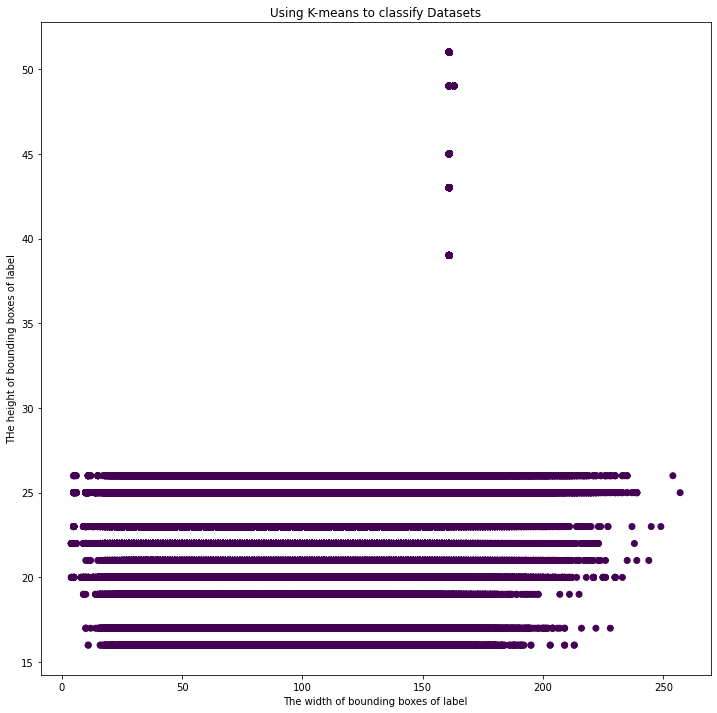

             0          1
0  1014.451424  23.238752


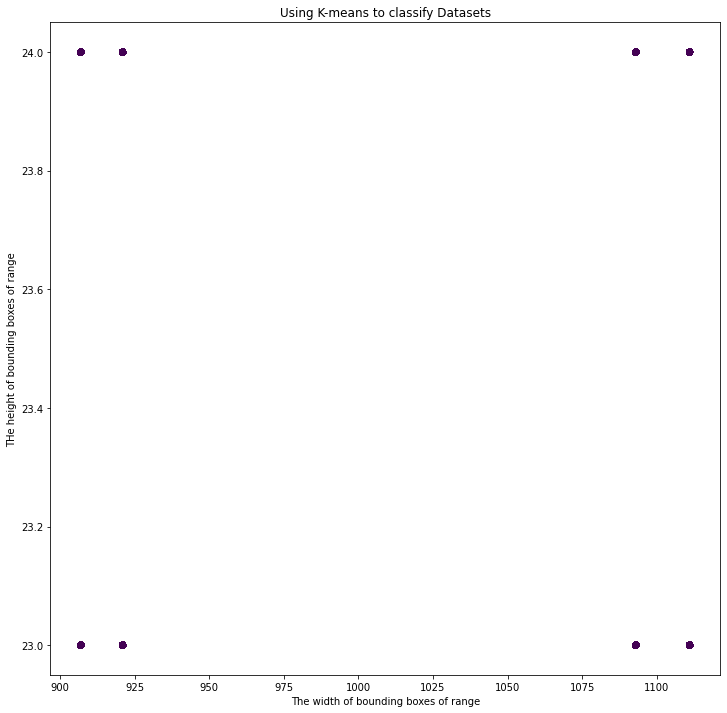

           0          1
0  741.83433  27.805231


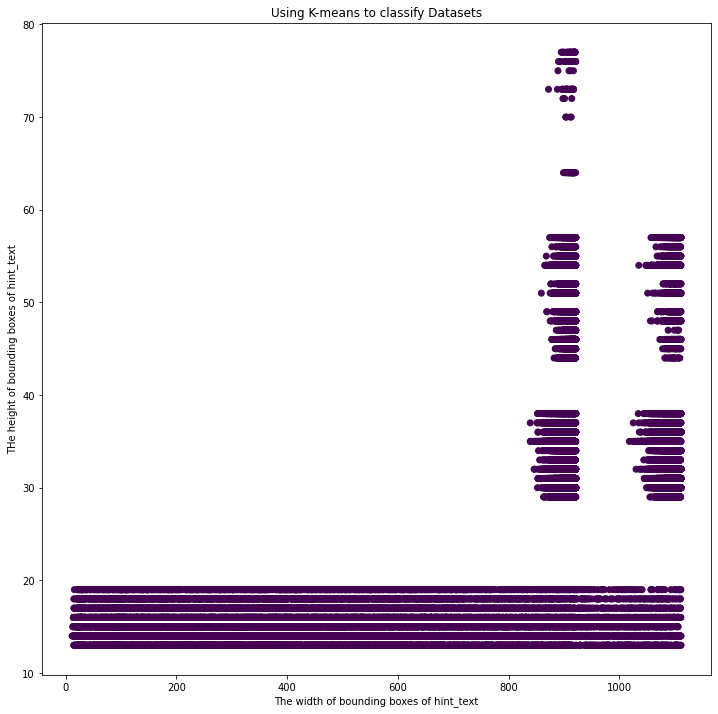

             0          1
0  1012.309854  39.630118


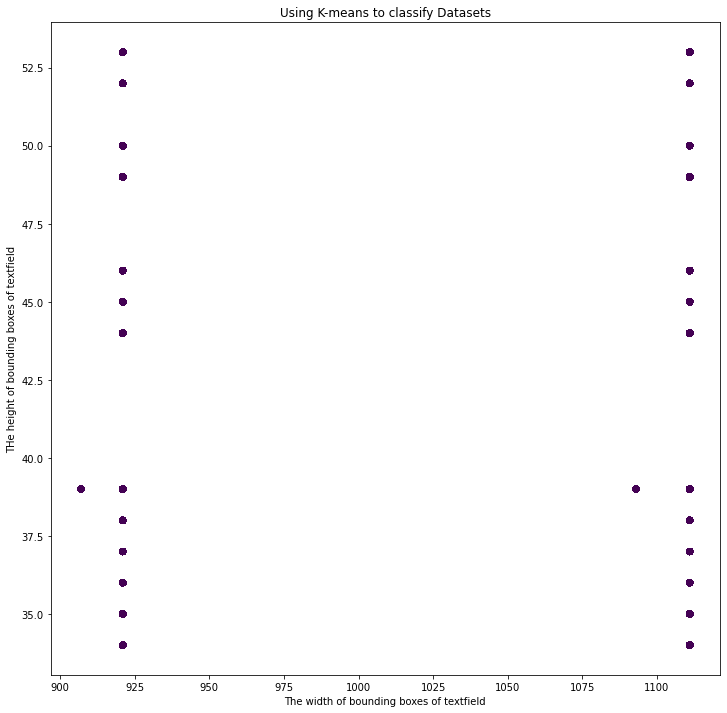

            0          1
0  730.219368  27.234078


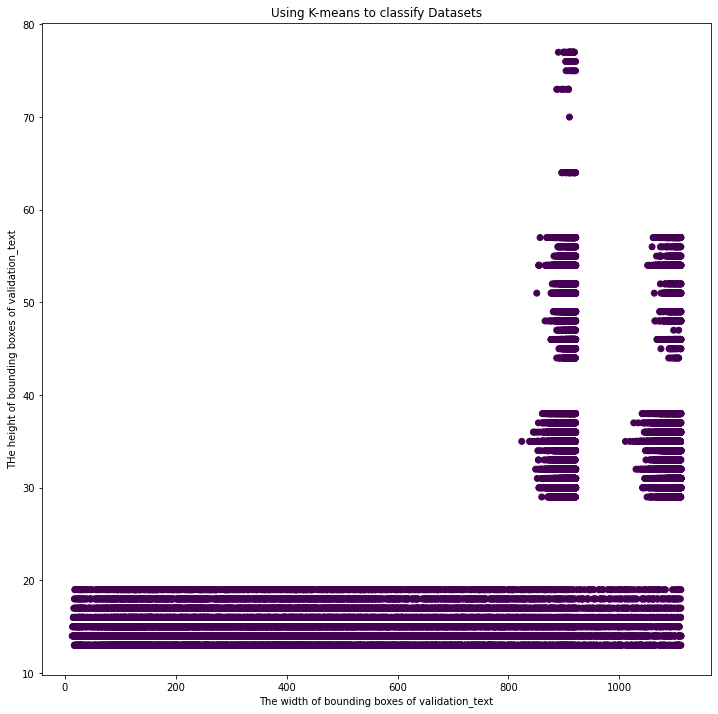

      0     1
0  29.0  19.0


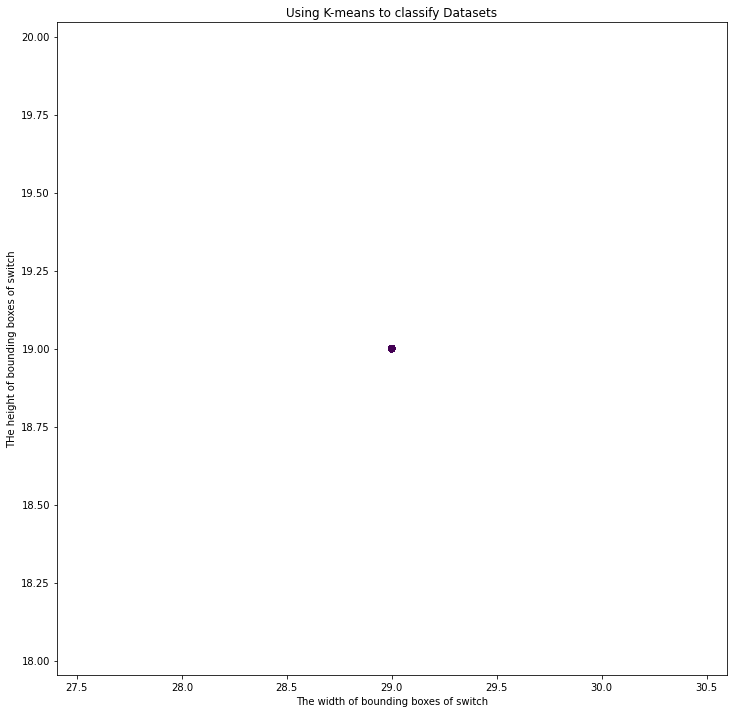

             0           1
0  1014.116858  207.134001


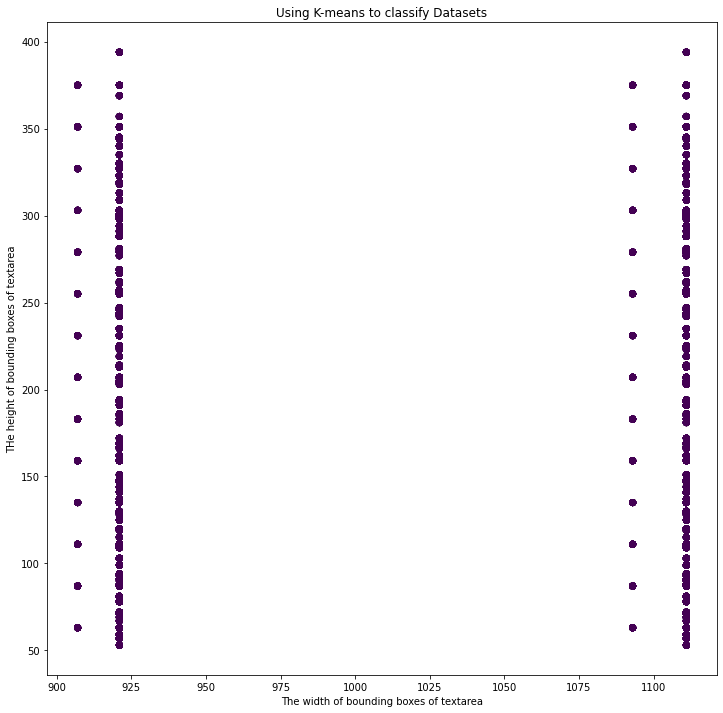

            0          1
0  123.885171  39.247496


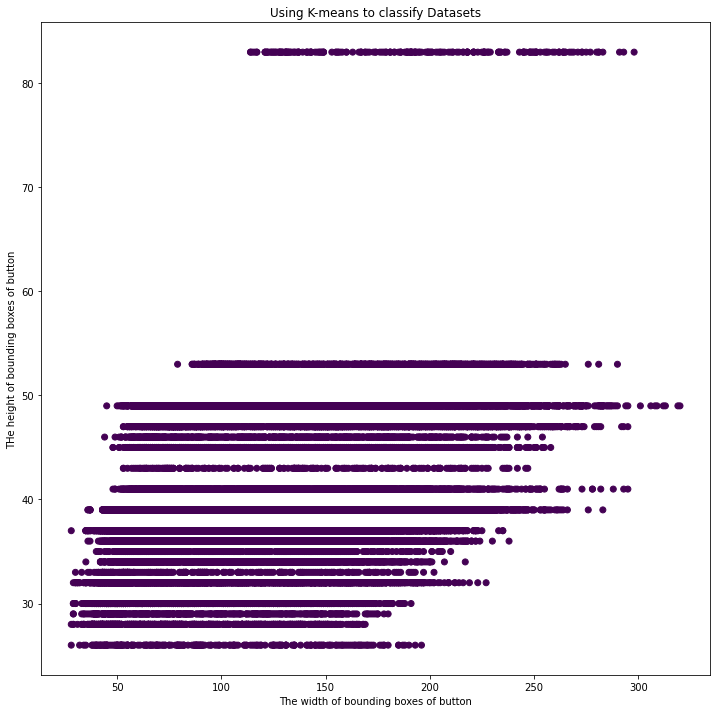

      0     1
0  14.0  14.0


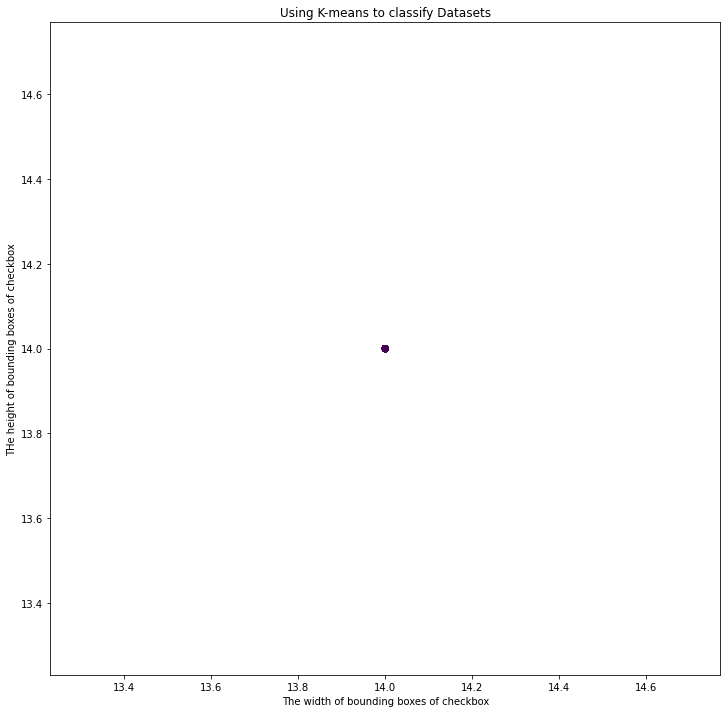

      0     1
0  14.0  14.0


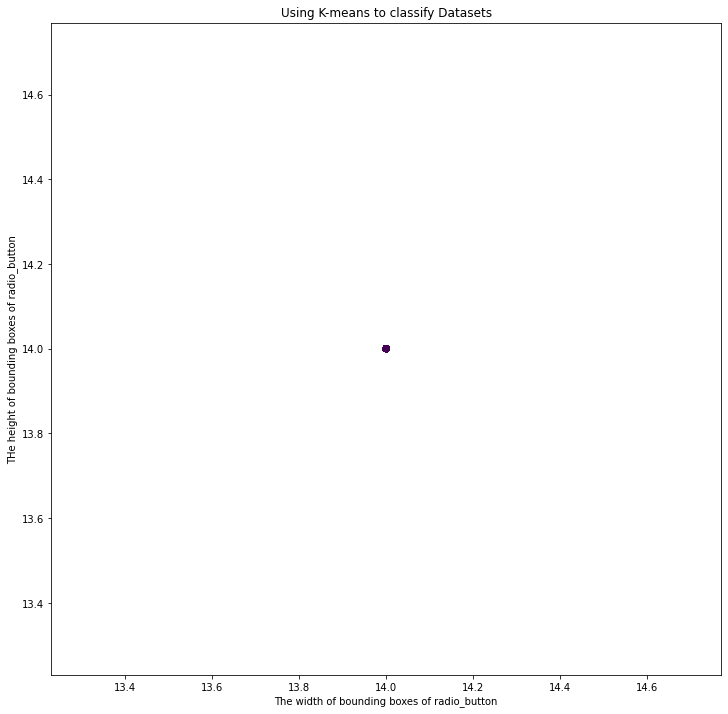

In [ ]:
for k in catid_boxes_h.keys():
  h_b = catid_boxes_h[k]
  w_b = catid_boxes_w[k]
  X = []
  for i in range(len(h_b)):
    X.append([w_b[i], h_b[i]])
  X = np.array(X)
  plt.figure(figsize=(12, 12))
  random_state = 10
  y = KMeans(n_clusters=1, init='k-means++')
  y_pred = y.fit_predict(X)
  center = pd.DataFrame(y.cluster_centers_)
  print(center)
  plt.ylabel("THe height of bounding boxes of "+ k)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("Using K-means to classify Datasets")
  plt.xlabel("The width of bounding boxes of " + k)
  plt.ylabel("THe height of bounding boxes of " + k)
  plt.show()

0.25 0.023 0.037 0.039 0.037 0.66 0.20 0.32 1 1 
0.03 0.25 0.7 1

Statistics about Bounding_boxes!(Considering Resize) 

In [ ]:
ids = list(sorted(coco.imgs.keys()))
coco_classes = dict([(v["id"], v["name"]) for k, v in coco.cats.items()])
w_bboxes = []
h_bboxes = []
catid_boxes_w = {}
catid_boxes_h = {}
for img_id in ids:
   h_img = coco.loadImgs(img_id)[0]['height']
   w_img = coco.loadImgs(img_id)[0]['width']
   size = 800.5 #size = np.random.randint(self.short_edge_length[0], self.short_edge_length[1] + 1)
   scale = size * 1.0 / min(h_img, w_img)
   if h_img < w_img:
     newh, neww = size, scale * w_img
   else:
     newh, neww = scale * h_img, size
   if max(newh, neww) > 1333:
     scale = 1333 * 1.0 / max(newh, neww)
     newh = newh * scale
     neww = neww * scale
     neww = int(neww + 0.5)
     newh = int(newh + 0.5)
   print("The old size of image:",(h_img, w_img))
   print("The new size of image:",(int(newh),int(neww)))
   ann_ids = coco.getAnnIds(imgIds=img_id)
   targets = coco.loadAnns(ann_ids)
   for target in targets:
     x, y, w, h = target["bbox"]
     w = w * (neww/w_img)
     h = h * (newh/h_img)
     w_bboxes.append(w)
     h_bboxes.append(h)
     ann = target["category_id"]
     ann = coco_classes[ann]
     if ann not in catid_boxes_h:
       catid_boxes_h[ann] = [h]
       catid_boxes_w[ann] = [w]
     else:
       catid_boxes_h[ann].append(h)
       catid_boxes_w[ann].append(w)

流式输出内容被截断，只能显示最后 5000 行内容。
The old size of image: (720, 1920)
The new size of image: (500, 1333)
The old size of image: (1322, 1920)
The new size of image: (800, 1162)
The old size of image: (1300, 1920)
The new size of image: (800, 1182)
The old size of image: (1219, 1920)
The new size of image: (800, 1260)
The old size of image: (2773, 1920)
The new size of image: (1156, 800)
The old size of image: (1969, 1920)
The new size of image: (820, 800)
The old size of image: (2279, 1920)
The new size of image: (950, 800)
The old size of image: (3221, 1920)
The new size of image: (1333, 795)
The old size of image: (1733, 1920)
The new size of image: (800, 886)
The old size of image: (629, 1920)
The new size of image: (437, 1333)
The old size of image: (1867, 1920)
The new size of image: (800, 823)
The old size of image: (702, 1920)
The new size of image: (487, 1333)
The old size of image: (934, 1920)
The new size of image: (648, 1333)
The old size of image: (1373, 1920)
The new size of image:

In [ ]:
small_bboxes = 0
for i in range(len(w_bboxes)):
  if w_bboxes[i] * h_bboxes[i] <= 32*32:
    small_bboxes += 1
printl(smal_bboxes/len(w_bboxes))

0.6525255929561444


In [ ]:
medium_bboxes = 0
for i in range(len(w_bboxes)):
  if w_bboxes[i] * h_bboxes[i] > 32*32 and w_bboxes[i] * h_bboxes[i] <= 96*96:
    medium_bboxes += 1
print(medium_bboxes/len(w_bboxes))

0.23404865413598208


In [ ]:
print(1-small_bboxes/len(w_bboxes) - medium_bboxes/len(w_bboxes) )

0.11342575290787349


           0          1
0  46.145859  11.539457


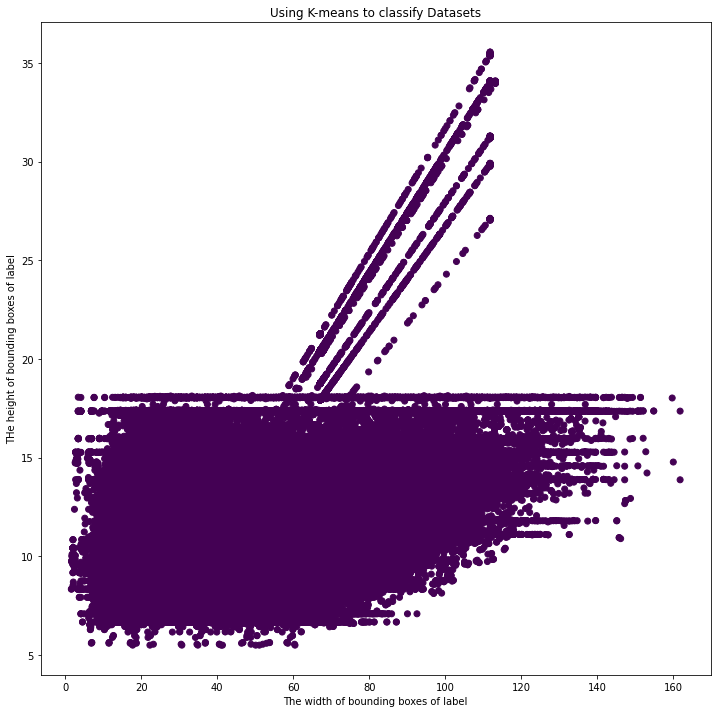

            0          1
0  524.037849  11.996311


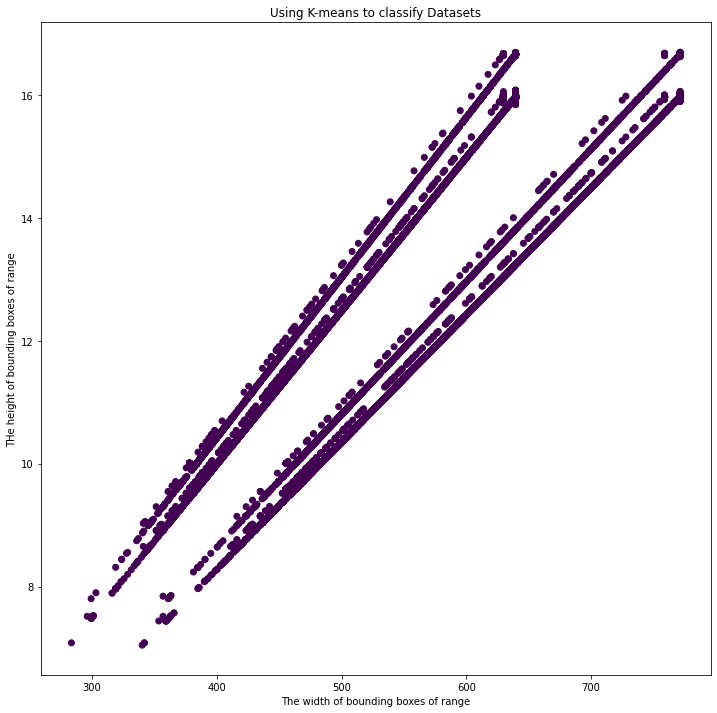

            0          1
0  375.186086  14.040747


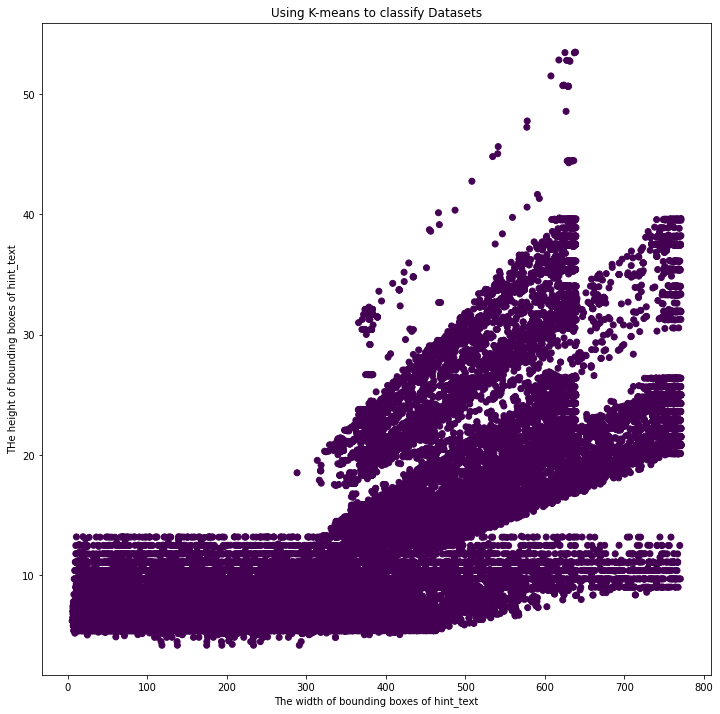

            0         1
0  517.229264  20.22565


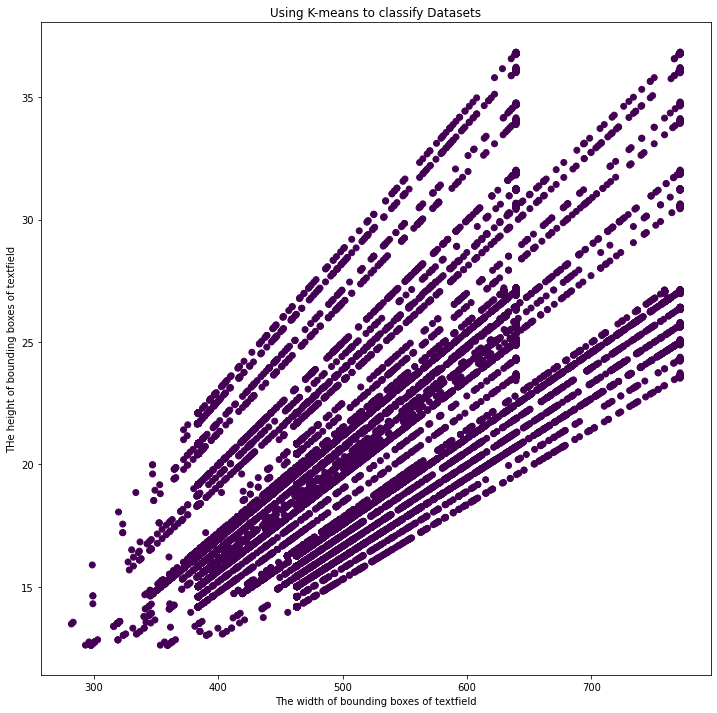

            0          1
0  364.795554  13.588032


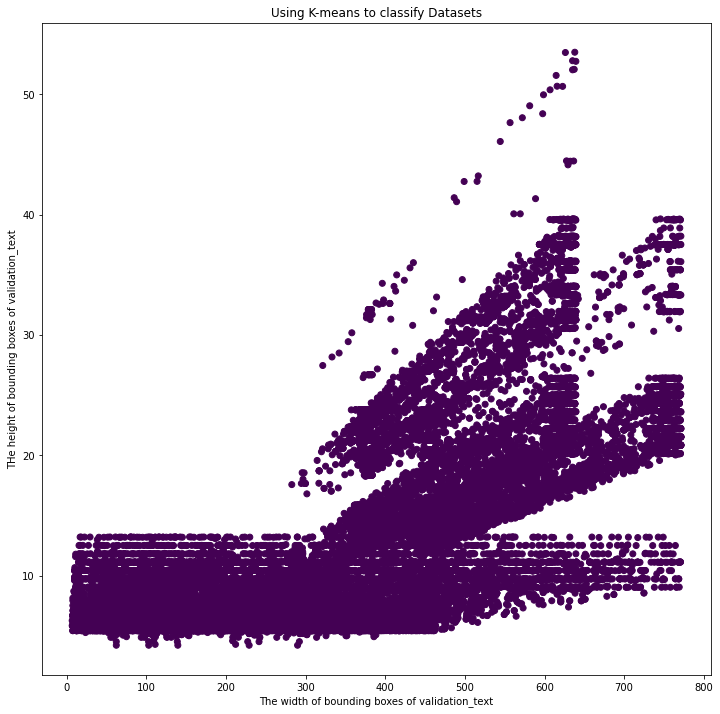

           0         1
0  15.098734  9.892318


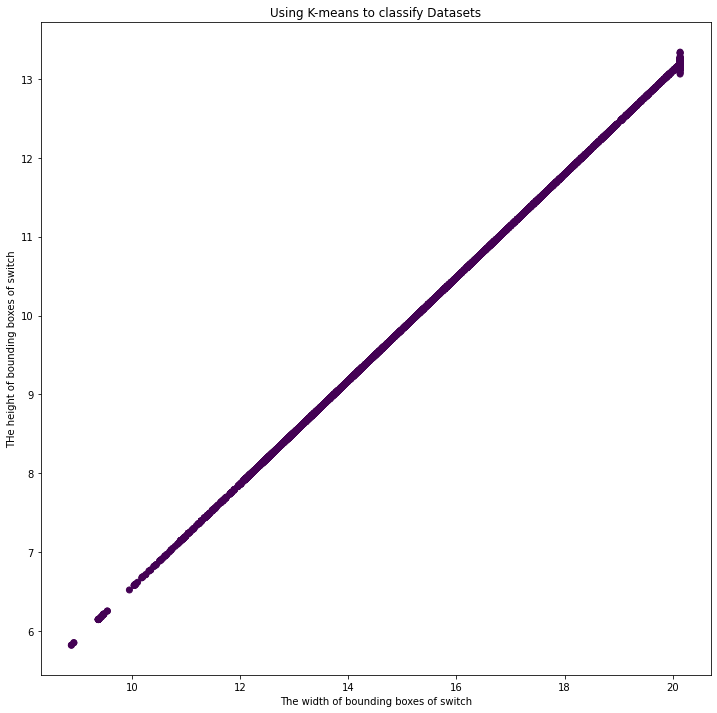

            0           1
0  501.226919  101.291667


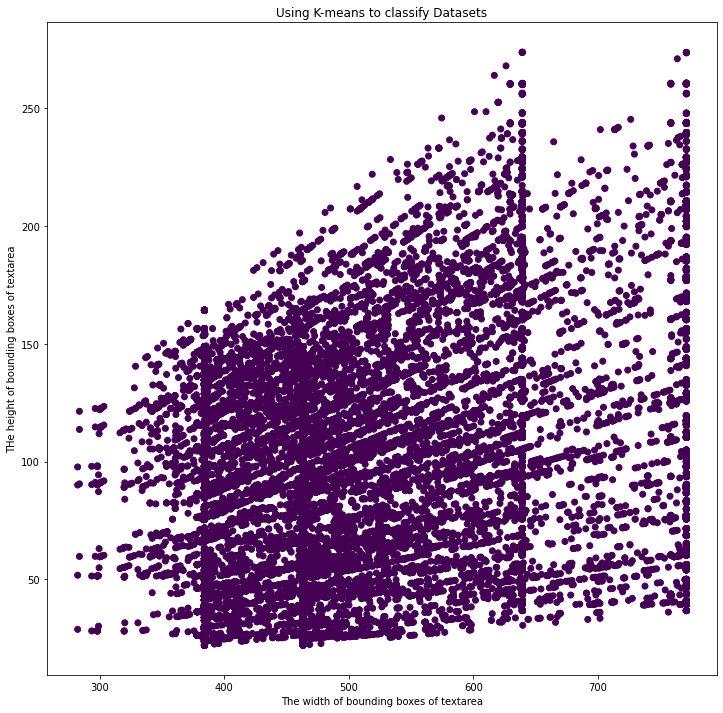

           0          1
0  70.916841  22.453649


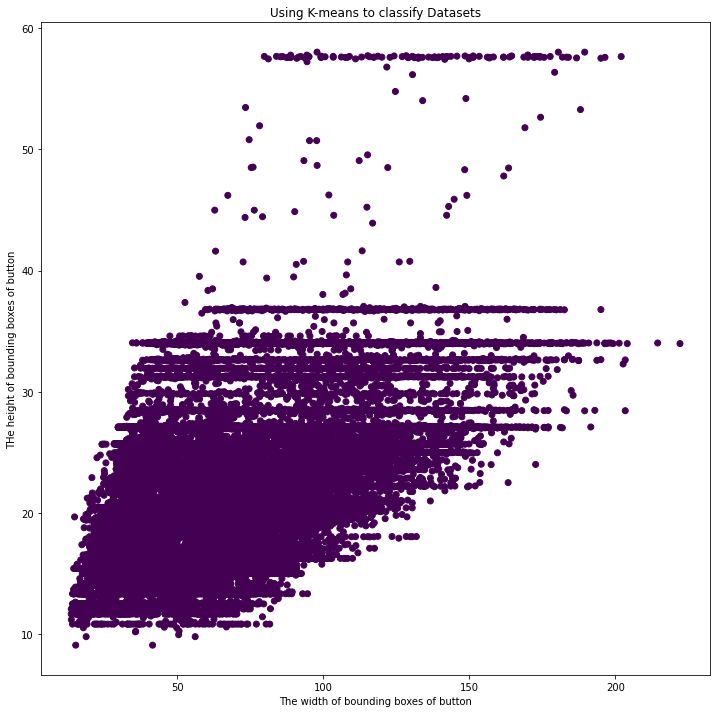

          0         1
0  7.116091  7.116035


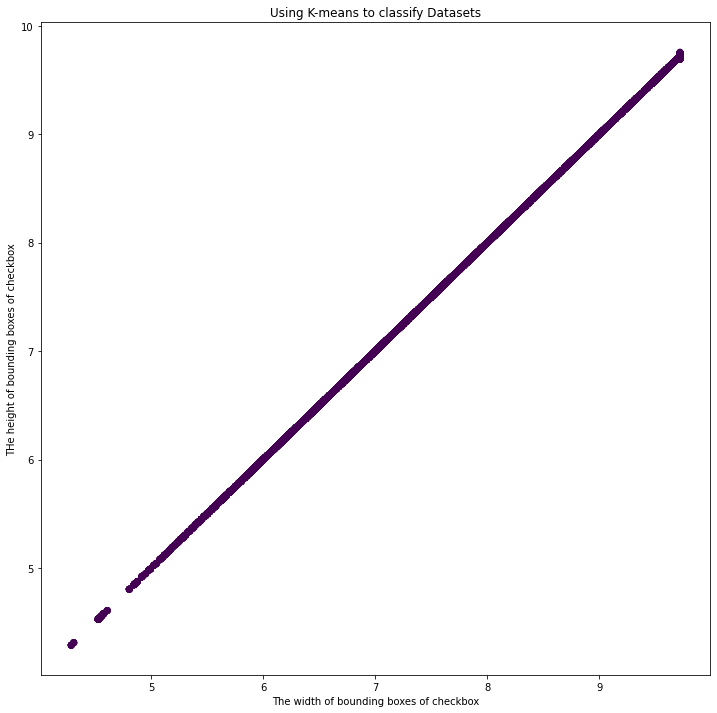

        0         1
0  6.9483  6.948283


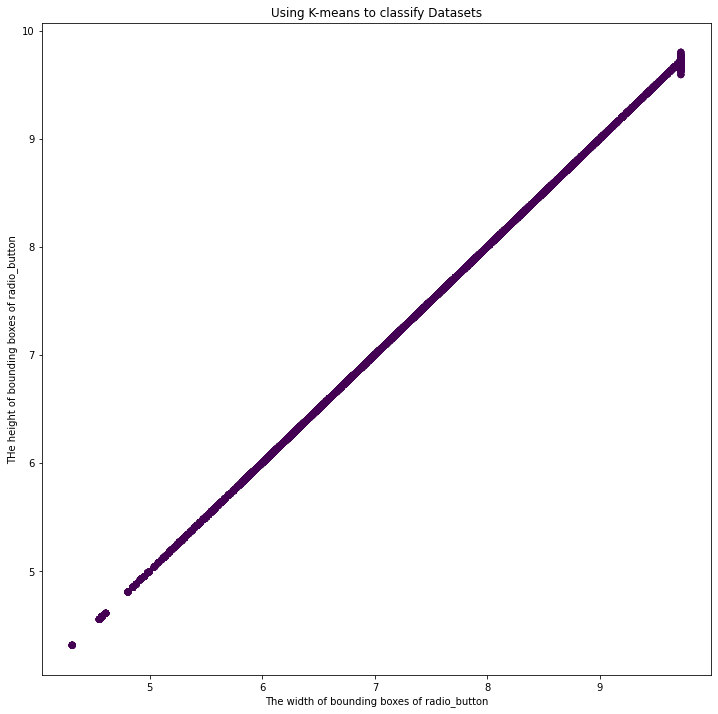

In [ ]:
for k in catid_boxes_h.keys():
  h_b = catid_boxes_h[k]
  w_b = catid_boxes_w[k]
  X = []
  for i in range(len(h_b)):
    X.append([w_b[i], h_b[i]])
  X = np.array(X)
  plt.figure(figsize=(12, 12))
  random_state = 10
  y = KMeans(n_clusters=1, init='k-means++')
  y_pred = y.fit_predict(X)
  center = pd.DataFrame(y.cluster_centers_)
  print(center)
  plt.ylabel("THe height of bounding boxes of "+ k)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("Using K-means to classify Datasets")
  plt.xlabel("The width of bounding boxes of " + k)
  plt.ylabel("THe height of bounding boxes of " + k)
  plt.show()

23 80 73 102 70 12 225 40 7 7
`7 7 12 23 40 70 73 80 102 225`